# КДЗ «Сортировки»

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Обязательная часть КДЗ

In [39]:
data = pd.read_csv("output.txt", sep=';', header=0)
data

,N,insert_sort,merge_sort
0,5,0.000542,0.001709
1,5,0.000333,0.001458
2,5,0.000333,0.001375
3,5,0.000375,0.001333
4,5,0.000375,0.001292
...,...,...,...
745,8000,63.477958,1.449250
746,8000,62.746709,1.445167
747,8000,62.902750,1.446333
748,8000,63.356334,1.437959


### Усредненные по N значения времени работы

In [40]:
mean = data.groupby(['N']).mean()
mean

,insert_sort,merge_sort
N,,
5,0.000322,0.001272
10,0.000801,0.002238
15,0.001436,0.003423
20,0.002564,0.005202
30,0.004457,0.007211
45,0.008715,0.011516
60,0.015710,0.018608
80,0.023659,0.023240
100,0.034613,0.029786


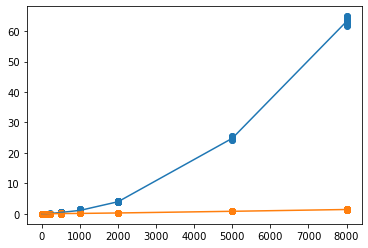

In [41]:
plt.scatter(data['N'], data['insert_sort'])
plt.plot(mean.index, mean['insert_sort'])
plt.scatter(data['N'], data['merge_sort'])
plt.plot(mean.index, mean['merge_sort'])
plt.show()

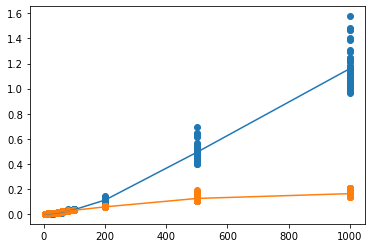

In [42]:
tmp = data[data['N'] <= 1000]
tmp_mean = tmp.groupby(['N']).mean()

plt.scatter(tmp['N'], tmp['insert_sort'])
plt.plot(tmp_mean.index, tmp_mean['insert_sort'])
plt.scatter(tmp['N'], tmp['merge_sort'])
plt.plot(tmp_mean.index, tmp_mean['merge_sort'])
plt.show()

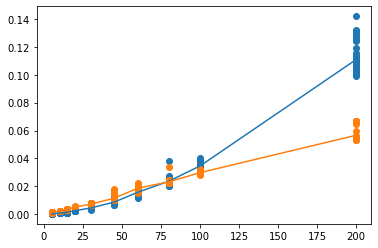

In [43]:
tmp = data[data['N'] <= 200]
tmp_mean = tmp.groupby(['N']).mean()

plt.scatter(tmp['N'], tmp['insert_sort'])
plt.plot(tmp_mean.index, tmp_mean['insert_sort'])
plt.scatter(tmp['N'], tmp['merge_sort'])
plt.plot(tmp_mean.index, tmp_mean['merge_sort'])
plt.show()

## Сравнение сортировки вставками и сортировки вставками с бинпоиском